- Môn học: Thống Kê Nhiều Chiều
- GVHD: TS. Nguyễn Thị Mộng Ngọc
- Ngành: Lý thuyết xác suất và thống kê Toán học
- Họ và Tên: Phạm Thị Hoà
- MSHV: 23C23007


# ĐỒ ÁN KẾT THÚC HỌC PHẦN

In [1]:
# Thư viện cần dùng trong bài
library(ggplot2)
library(repr)


In [2]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)


## PHẦN I. PHÂN TÍCH THÀNH PHẦN CHÍNH PCA

- Bộ dữ liệu lựa chọn: BostonHousing.csv
- Nguồn: Kaggle - https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset
- Đặc trưng của bộ dữ liệu:
  - CRIM: Tỷ lệ tội phạm trên mỗi dân số.
  - ZN: Tỷ lệ đất ở được quy hoạch cho các lô đất trên 25,000 feet vuông.
  - INDUS: Tỷ lệ phần trăm diện tích thương mại không bao gồm các khu vực thương mại đặc biệt.
  - CHAS: Biến giả (dummy variable) cho sông Charles (= 1 nếu mảnh đất giáp sông; 0 nếu không).
  - NOX: Tích tụ nitrogen oxides (ppm).
  - RM: Số phòng trung bình trên mỗi căn hộ.
  - AGE: Tỷ lệ phần trăm các căn hộ được xây dựng trước năm 1940.
  - DIS: Khoảng cách đến trung tâm việc làm tại Boston.
  - RAD: Chỉ số tiện ích truy cập tới các tuyến đường cao tốc.
  - TAX: Thuế suất tài sản thuế có giá trị đầy đủ cho mỗi $10,000.
  - PTRATIO: Tỷ lệ học sinh-giáo viên theo từng thành phố.
  - B: 1000(Bk - 0.63)^2, trong đó Bk là tỷ lệ người Mỹ gốc Phi theo từng thành phố.
  - LSTAT: Tỷ lệ phần trăm dân số thu nhập thấp.
  - MEDV: Giá trị trung bình của các nhà đất riêng (dollar).
- Lựa chọn các biến dữ liệu để khảo sát:
  - RM
  - AGE
  - DIS
  - RAD
  - TAX
  - MEDV


In [3]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "../data-PhamThiHoa/BostonHousing.csv", sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path)
# Chỉ chọn những biến muốn khảo sát
df <- df[, c("rm", "age", "dis", "rad", "tax", "medv")]
# # Xem 6 dòng đầu tiên của dữ liệu
head(df)


,rm,age,dis,rad,tax,medv
,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,6.575,65.2,4.0900,1,296,24.0
2,6.421,78.9,4.9671,2,242,21.6
3,7.185,61.1,4.9671,2,242,34.7
4,6.998,45.8,6.0622,3,222,33.4
5,7.147,54.2,6.0622,3,222,36.2
6,6.430,58.7,6.0622,3,222,28.7


### TIỀN XỬ LÝ DỮ LIỆU


In [4]:
# Kiểm tra số dòng và số cột của dữ liệu:
dim(df)


[1] 506   6

In [5]:
# Kiểm tra dữ liệu
str(df) # Xem cấu trúc dữ liệu
summary(df) # Xem tổng quan về dữ liệu


'data.frame':	506 obs. of  6 variables:
 $ rm  : num  6.58 6.42 7.18 7 7.15 ...
 $ age : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax : int  296 242 242 222 222 222 311 311 311 311 ...
 $ medv: num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


       rm             age              dis              rad        
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 1.000  
 1st Qu.:5.884   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.: 4.000  
 Median :6.208   Median : 77.50   Median : 3.207   Median : 5.000  
 Mean   :6.284   Mean   : 68.57   Mean   : 3.795   Mean   : 9.549  
 3rd Qu.:6.625   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:24.000  
 Max.   :8.780   Max.   :100.00   Max.   :12.127   Max.   :24.000  
 NA's   :5                                                         
      tax             medv      
 Min.   :187.0   Min.   : 5.00  
 1st Qu.:279.0   1st Qu.:17.02  
 Median :330.0   Median :21.20  
 Mean   :408.2   Mean   :22.53  
 3rd Qu.:666.0   3rd Qu.:25.00  
 Max.   :711.0   Max.   :50.00  
                                

- Tất cả các biến đều dưới dạng numeric/int
- Biến tax có mean và median (khoảng dữ liệu) cao hơn nhiều so với những biến còn lại


In [6]:
# Kiểm tra giá trị thiếu
colSums(is.na(df))


rm  age  dis  rad  tax medv 
   5    0    0    0    0    0

- Có 5 giá trị rm bị thiếu


In [7]:
# Xem những dòng có rm bị thiếu:
missing_rm_rows <- which(is.na(df$rm))
df[missing_rm_rows, ]


,rm,age,dis,rad,tax,medv
,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
11,NA,94.3,6.3467,5,311,15.0
36,NA,68.2,3.3603,5,279,18.9
64,NA,43.4,7.9809,8,284,25.0
97,NA,69.6,3.4952,2,276,21.4
136,NA,98.2,2.1107,4,437,18.1


- df có tổng 506 dòng dữ liệu, tỉ lệ 5 dòng thiếu là 5/506\*100 = 0.988%. Chúng ta có thể loại bỏ dữ liệu thiếu này ra khỏi df


In [8]:
# Xoá bỏ dữ liệu na
df <- na.omit(df)
# Kiểm tra lại số dòng và số cột sau khi đã loại bỏ na
dim(df)


[1] 501   6

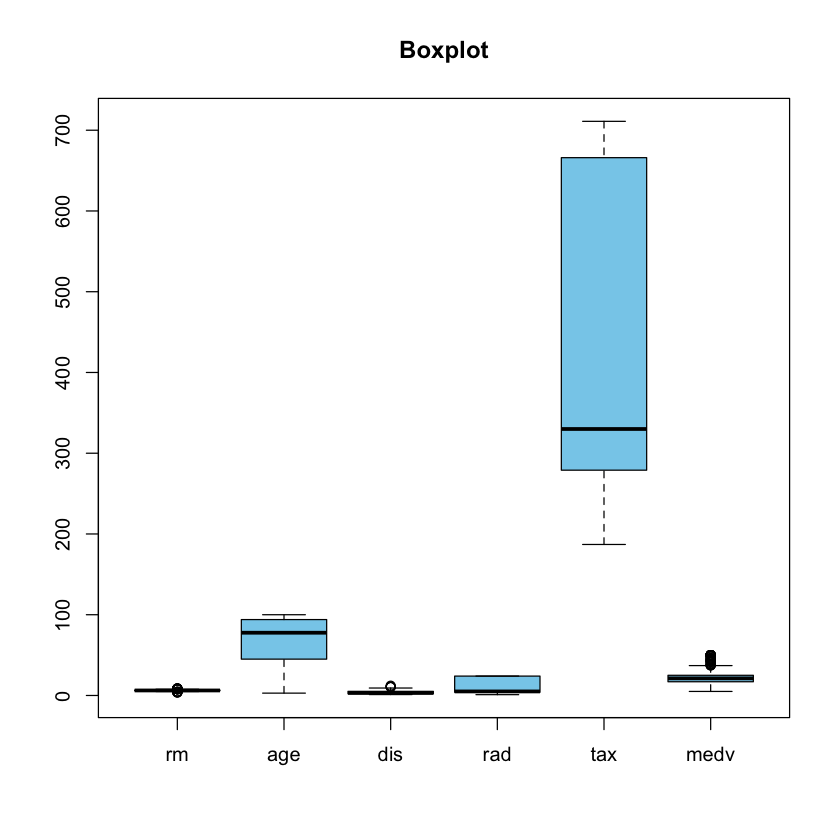

In [9]:
# Vẽ biểu đồ Boxplot để kiểm tra outlier
boxplot(df, col = "skyblue", main = "Boxplot")


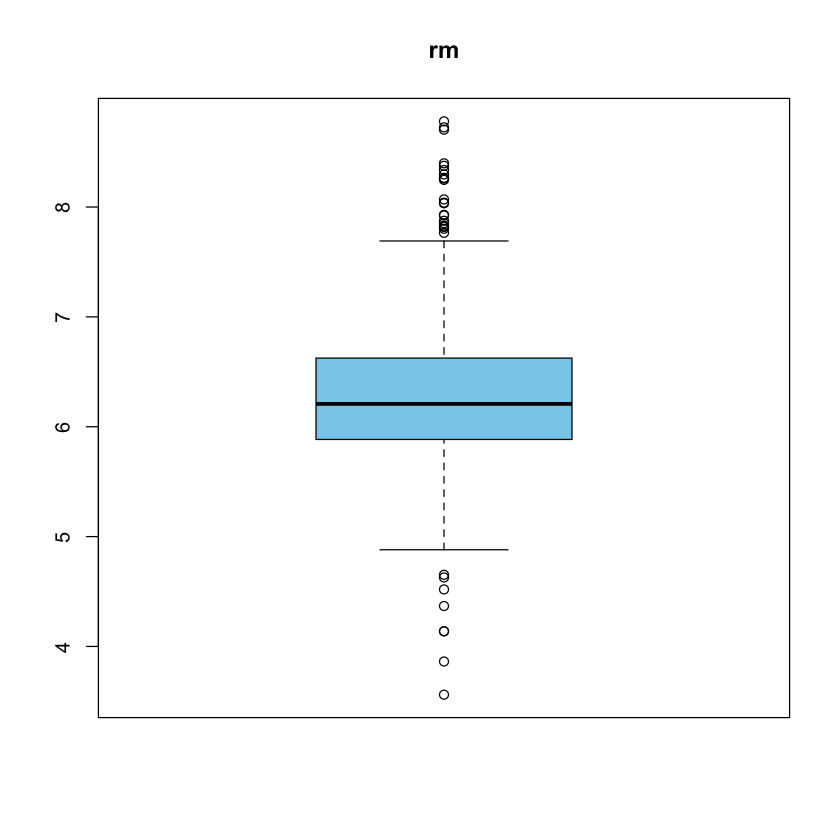

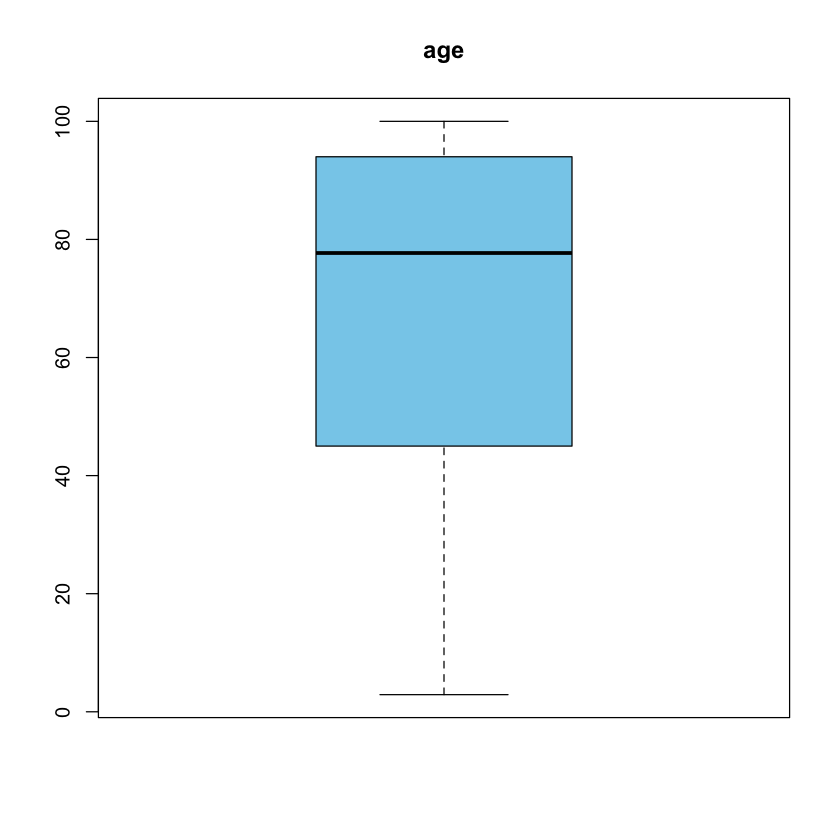

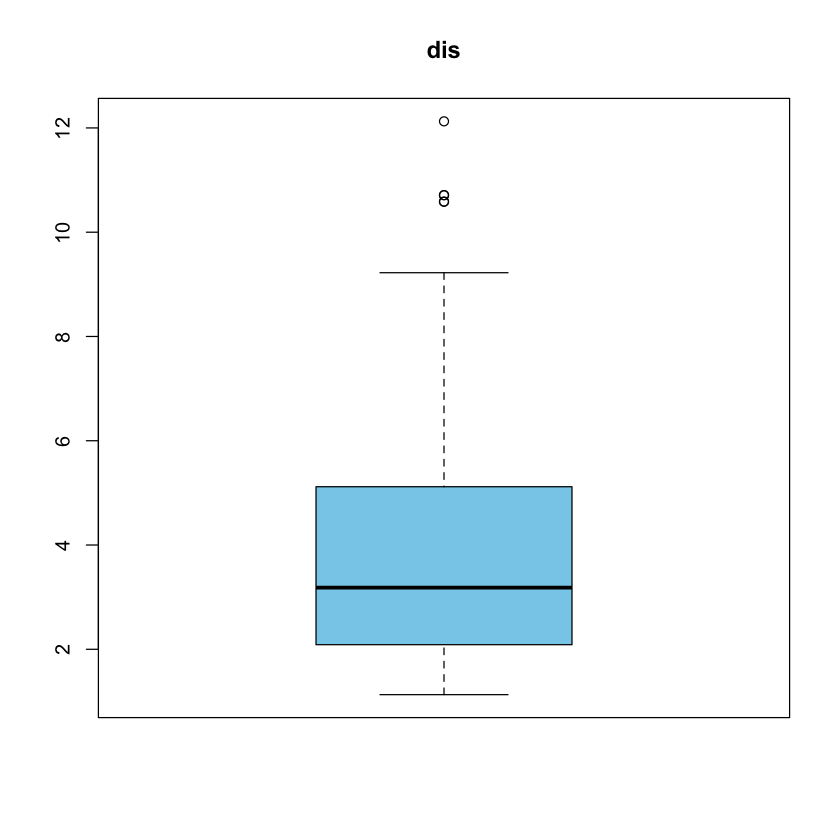

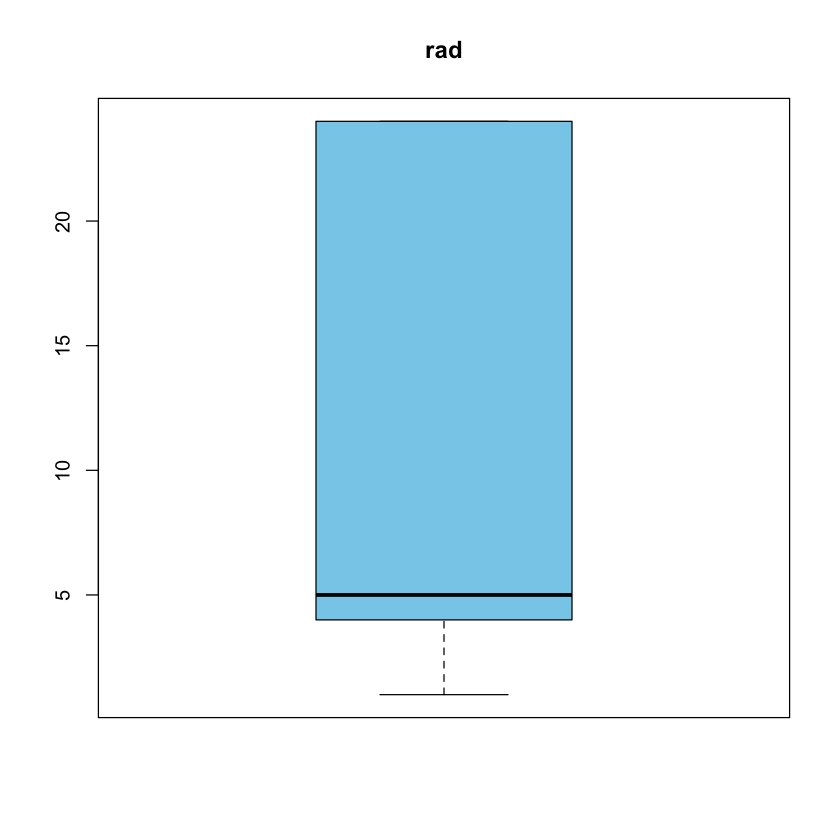

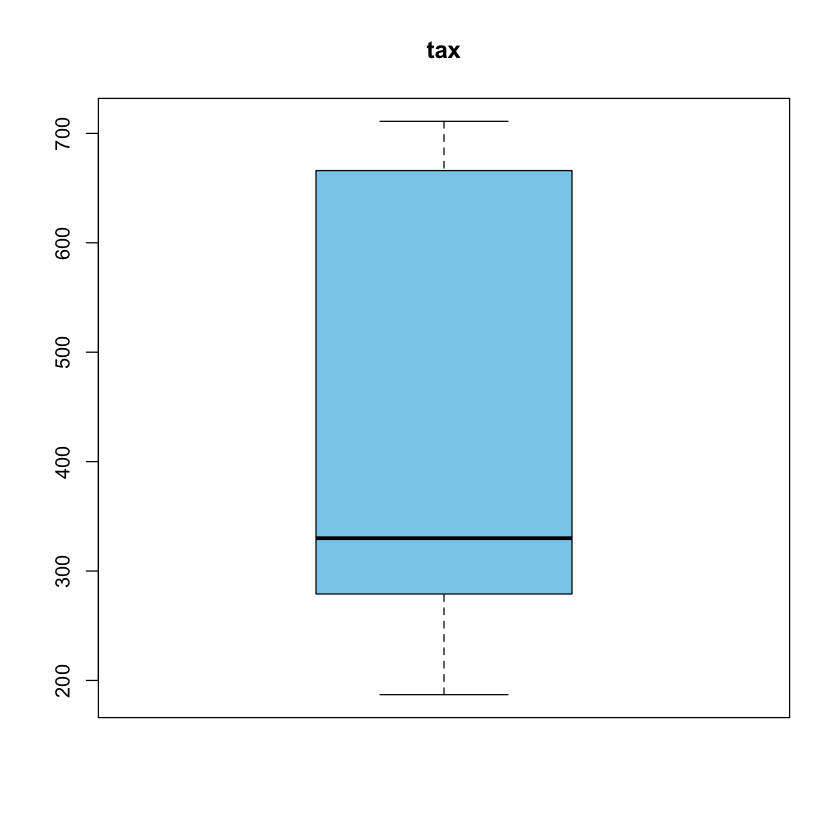

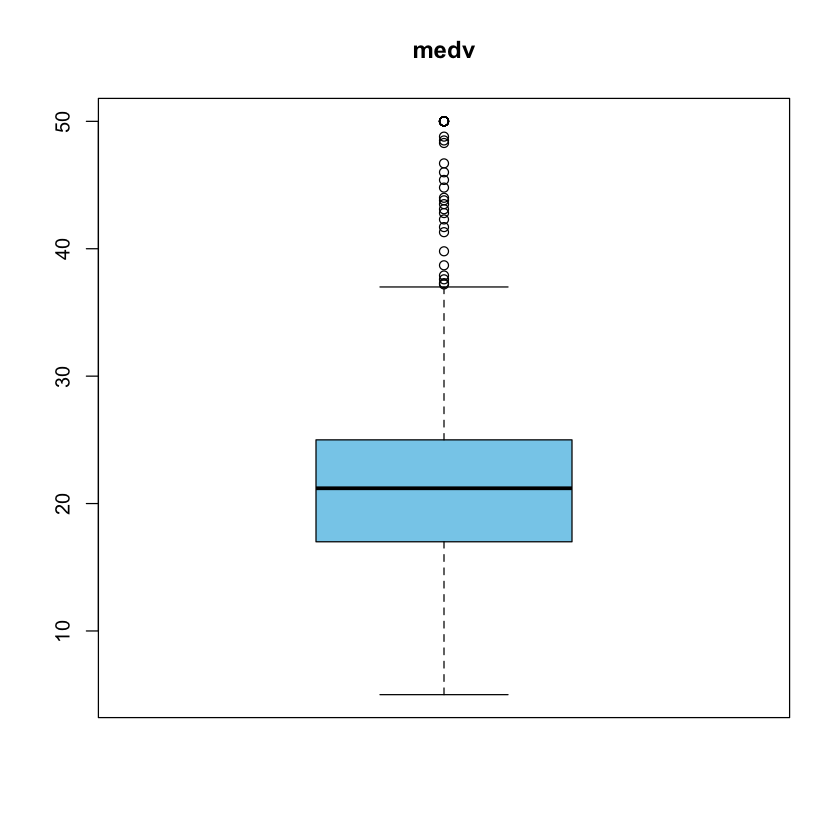

In [10]:
# Boxplot cho từng biến trên khác biểu đồ
for (col in colnames(df)) {
    # options(repr.plot.width=10, repr.plot.height=7)
    boxplot(df[[col]], col = "skyblue", main = col)
}


In [11]:
# Lưu tất cả dữ liệu ngoại lai vào outlier_df
outlier_df <- data.frame()
cols <- names(df)
for (col in cols) {
    Q1 <- quantile(df[[col]], 0.25)
    Q3 <- quantile(df[[col]], 0.75)
    IQR <- Q3 - Q1
    outliers <- df[df[[col]] < (Q1 - 1.5 * IQR) | df[[col]] > (Q3 + 1.5 * IQR), ]
    n_out <- nrow(outliers)
    print(paste("So outlier cua cot ", col, ": ", n_out))
    outlier_df <- rbind(outlier_df, outliers)
}
print(paste("Tong so outlier cua df: ", nrow(unique(outlier_df))))


[1] "So outlier cua cot  rm :  30"
[1] "So outlier cua cot  age :  0"
[1] "So outlier cua cot  dis :  5"
[1] "So outlier cua cot  rad :  0"
[1] "So outlier cua cot  tax :  0"
[1] "So outlier cua cot  medv :  37"
[1] "Tong so outlier cua df:  51"


- Toàn bộ df có  51 dòng outlier, chiếm 10.18% trên tổng số dữ liệu
- Các giá trị ngoại lệ có thể phản ánh các trường hợp thực tế, hiện tượng hiếm gặp hoặc các điều kiện đặc biệt, do đó quyết định không loại bỏ outlier trong trường hợp này vì  điều này có thể giúp đảm bảo rằng phân tích không bị thiên lệch do loại bỏ dữ liệu.
- Dữ liệu có sự chênh lệch lớn đối với biến tax so với những biến còn lại, do đó quyết định sử dụng PCA trên ma trận tương quan R


### TIẾN HÀNH PCA DỰA TRÊN MA TRẬN TƯƠNG QUAN R


In [12]:
# Ma trận tương quan R của dữ liệu
R <- cor(df)
R


,rm,age,dis,rad,tax,medv
rm,1.0000000,-0.2402864,0.2035071,-0.2107183,-0.2927943,0.6961687
age,-0.2402864,1.0000000,-0.7514999,0.4600904,0.5083378,-0.3754369
dis,0.2035071,-0.7514999,1.0000000,-0.4979698,-0.5347629,0.2517090
rad,-0.2107183,0.4600904,-0.4979698,1.0000000,0.9109113,-0.3847295
tax,-0.2927943,0.5083378,-0.5347629,0.9109113,1.0000000,-0.4712530
medv,0.6961687,-0.3754369,0.2517090,-0.3847295,-0.4712530,1.0000000


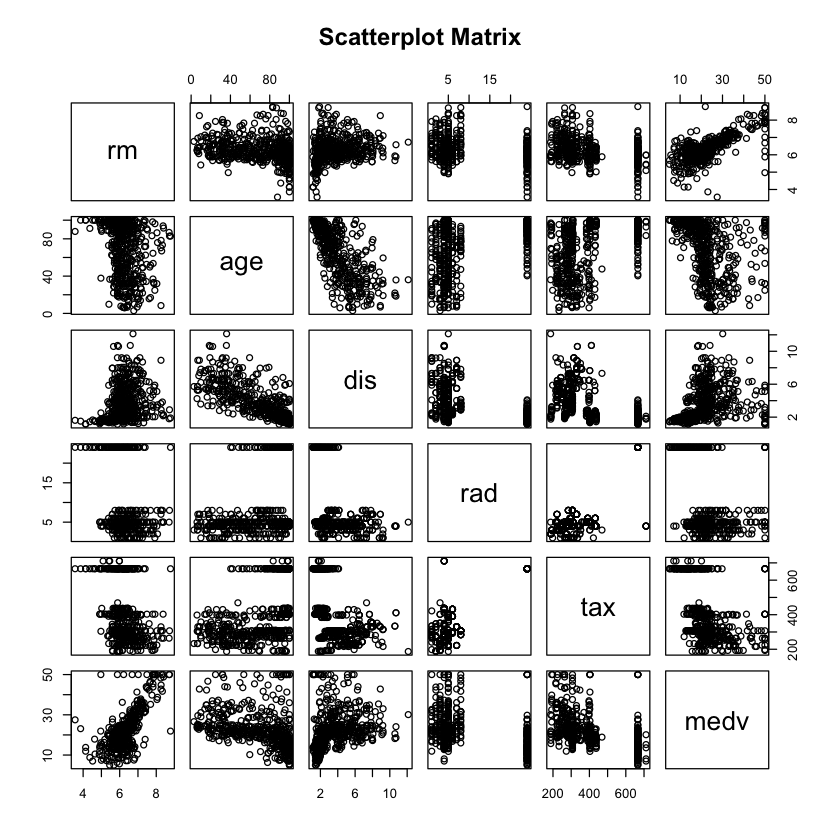

In [13]:
# Vẽ biểu đồ Scatterplot cho toàn bộ các cột dữ liệu
pairs(df, main = "Scatterplot Matrix")


In [14]:
# Xây dựng thành phần chính cho bởi ma trận tương quan R
pca <- princomp(df, cor = TRUE)
summary(pca, loadings = TRUE)


Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.8195068 1.1207232 0.9103661 0.56268453 0.45309192
Proportion of Variance 0.5517675 0.2093368 0.1381277 0.05276898 0.03421538
Cumulative Proportion  0.5517675 0.7611043 0.8992320 0.95200099 0.98621637
                           Comp.6
Standard deviation     0.28757916
Proportion of Variance 0.01378363
Cumulative Proportion  1.00000000

Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
rm    0.294  0.673  0.147  0.575  0.329       
age  -0.419  0.233 -0.528  0.405 -0.572       
dis   0.410 -0.338  0.464  0.400 -0.584       
rad  -0.449  0.218  0.527        -0.108 -0.675
tax  -0.478  0.150  0.454                0.734
medv  0.374  0.555        -0.582 -0.457       

#### Từ kết quả PCA thu được, ta có nhận xét như sau:

- Tầm Quan Trọng Của Các Thành Phần (Component Importance):
  - Standard Deviation (Độ lệch chuẩn): Độ lệch chuẩn cao cho thành phần đầu tiên (Comp.1) chỉ ra rằng nó chứa phần lớn sự biến thiên trong dữ liệu. Các thành phần sau lần lượt có độ lệch chuẩn giảm dần, cho thấy sự quan trọng của chúng trong việc giải thích dữ liệu cũng giảm dần.
  - Proportion of Variance (Tỷ lệ phương sai): Comp.1 chiếm 55.18% tổng phương sai, cho thấy nó là thành phần quan trọng nhất. Comp.2 và Comp.3 lần lượt giải thích 20.93% và 13.81% phương sai, với tổng cộng ba thành phần đầu tiên giải thích được hơn 89.92% tổng phương sai.
  - Cumulative Proportion (Tỷ lệ tích lũy): Đến Comp.3, tổng tỷ lệ phương sai tích lũy đã đạt gần 90%, và Comp.6 đưa tỷ lệ này lên đến 100%, cho thấy sáu thành phần đã đầy đủ giải thích toàn bộ phương sai trong dữ liệu.
- Loadings (Hệ số tải)
  - Comp.1: Biểu thị sự tương quan dương mạnh với dis và medv, và tương quan âm mạnh với age, rad, tax. Thành phần này có thể được hiểu là liên quan đến sự tương phản giữa các yếu tố dân số và kinh tế.
  - Comp.2: Có tương quan dương mạnh với rm và medv, cho thấy thành phần này có thể đại diện cho các yếu tố liên quan đến chất lượng nhà ở và giá trị bất động sản.
  - Comp.3: Đặc trưng bởi tương quan âm mạnh với age và tương quan dương mạnh với rad và tax, có thể phản ánh sự ảnh hưởng của tuổi đời cơ sở hạ tầng và mức thuế đến các khu vực cụ thể.
  - Comp.4: Tương quan âm mạnh với medv và tương quan dương mạnh với rm, dis, gợi ý về mối liên hệ giữa việc tiếp cận và chất lượng nhà ở.
  - Comp.5 và Comp.6: Mặc dù chúng giải thích một phần phương sai nhỏ, các hệ số tải cho thấy chúng vẫn cung cấp thông tin quan trọng về các mối quan hệ giữa rad, tax với các biến khác, chẳng hạn như mức độ tương quan giữa chính sách thuế và cơ sở hạ tầng với các yếu tố khác trong bộ dữ liệu.

#### Kết Luận

Từ bảng tỉ lệ đóng góp của các thành phần chính vào tổng phương sai suy rộng, ta nhận thấy rằng: Việc sử dụng ba thành phần chính đầu tiên (Comp.1, Comp.2, Comp.3) đã giải thích khoảng 89.92320% tổng biến thiên, cho thấy chúng cung cấp một cái nhìn khá toàn diện về dữ liệu mà không cần phải xem xét tất cả các biến gốc. Điều này rất hữu ích trong việc giảm kích thước dữ liệu và trực quan hóa, đồng thời vẫn bảo toàn được phần lớn thông tin quan trọng trong dữ liệu.


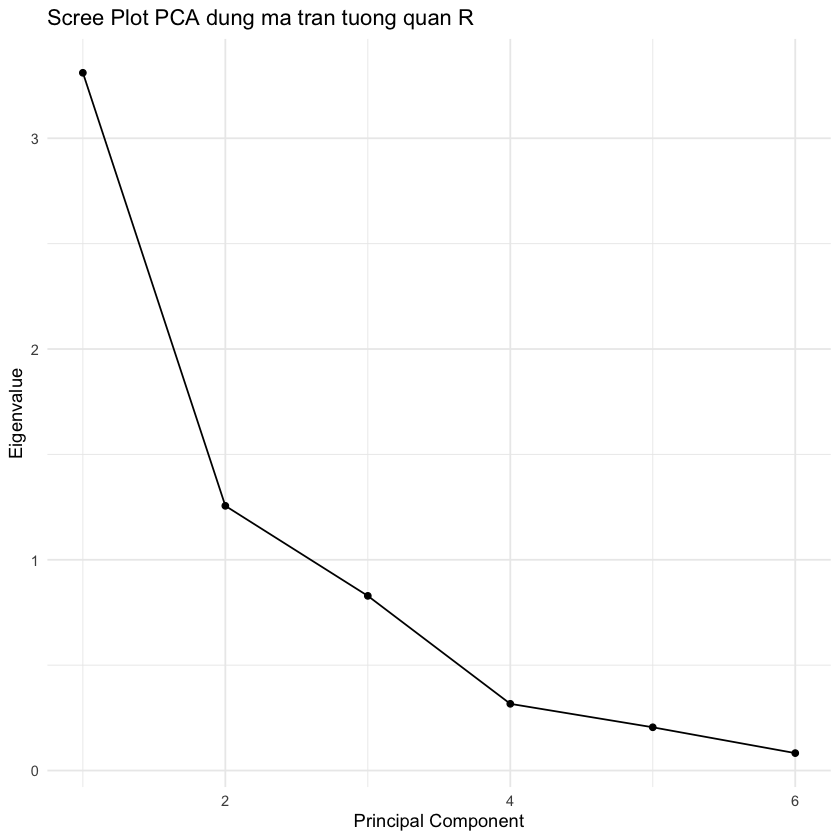

In [15]:
eigen <- pca$sdev^2
# Tạo dataframe cho biểu đồ
scree <- data.frame(
  Component = seq_along(eigen),
  Eigenvalue = eigen
)
# Vẽ biểu đồ
ggplot(scree, aes(x = Component, y = Eigenvalue)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Scree Plot PCA dung ma tran tuong quan R",
    x = "Principal Component",
    y = "Eigenvalue"
  ) +
  theme_minimal()


## PHẦN II. PHÂN TÍCH NHÂN TỐ (FACTOR ANALYSIC)

- Bộ dữ liệu lựa chọn: WineQT.csv
- Nguồn: Kaggle - https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
- Đặc trưng của bộ dữ liệu:
  - Mã số: Đây là cột chỉ số thứ tự của mỗi mẫu rượu.
  - Chỉ số độ axit cố định: Lượng axit không bay hơi có trong rượu.
  - Chỉ số độ axit bay hơi: Lượng axit có thể bay hơi khỏi rượu.
  - Chỉ số axit xitric: Lượng axit xitric, một loại axit hữu cơ có trong rượu.
  - Đường: Lượng đường còn lại trong rượu.
  - Chlorides (Clo): Lượng clo có trong rượu.
  - Lượng tự do SO2 (Sulfur dioxide): Lượng sulfur dioxide tự do, một loại chất bảo quản.
  - Tổng lượng SO2 (Tổng sulfur dioxide): Tổng lượng sulfur dioxide, bao gồm cả liên kết và tự do.
  - Mật độ: Mật độ của rượu có thể được dùng để ước lượng nồng độ cồn.
  - pH: Mức độ axit hoặc bazơ của rượu.
  - Sulphates (Sulfat): Lượng sulfat trong rượu, ảnh hưởng đến khả năng chống oxy hóa và chất bảo quản.
  - Alcohol (Nồng độ cồn): Phần trăm thể tích của cồn trong rượu.
  - Quality (Chất lượng): Điểm số chất lượng của rượu, thường được đánh giá bởi các chuyên gia dựa trên thang điểm từ 0 đến 10.
- Chọn một số biến để khảo sát:
  - Chỉ số axit xitric: citric.acid
  - Đường: residual.sugar
  - Chlorides (Clo): chlorides
  - Lượng tự do SO2 (Sulfur dioxide): free.sulfur.dioxide
  - Tổng lượng SO2 (Tổng sulfur dioxide): total.sulfur.dioxide
  - Mật độ: density


In [16]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "../data-PhamThiHoa/WineQT.csv", sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path)
# Chỉ chọn những biến muốn khảo sát
df <- df[, c("citric.acid", "residual.sugar", "chlorides", "free.sulfur.dioxide", "total.sulfur.dioxide", "density")]# # Xem 6 dòng đầu tiên của dữ liệu
head(df)


,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,1.9,0.076,11,34,0.9978
2,0.00,2.6,0.098,25,67,0.9968
3,0.04,2.3,0.092,15,54,0.9970
4,0.56,1.9,0.075,17,60,0.9980
5,0.00,1.9,0.076,11,34,0.9978
6,0.00,1.8,0.075,13,40,0.9978


### TIỀN XỬ LÝ DỮ LIỆU


In [17]:
# Kiểm tra số dòng và số cột của dữ liệu:
dim(df)


[1] 1143    6

In [18]:
# Kiểm tra dữ liệu
str(df) # Xem cấu trúc dữ liệu
summary(df) # Xem tổng quan về dữ liệu


'data.frame':	1143 obs. of  6 variables:
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.08 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 1.8 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.097 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 15 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 65 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...


  citric.acid     residual.sugar     chlorides       free.sulfur.dioxide
 Min.   :0.0000   Min.   : 0.900   Min.   :0.01200   Min.   : 1.00      
 1st Qu.:0.0900   1st Qu.: 1.900   1st Qu.:0.07000   1st Qu.: 7.00      
 Median :0.2500   Median : 2.200   Median :0.07900   Median :13.00      
 Mean   :0.2684   Mean   : 2.532   Mean   :0.08693   Mean   :15.62      
 3rd Qu.:0.4200   3rd Qu.: 2.600   3rd Qu.:0.09000   3rd Qu.:21.00      
 Max.   :1.0000   Max.   :15.500   Max.   :0.61100   Max.   :68.00      
 total.sulfur.dioxide    density      
 Min.   :  6.00       Min.   :0.9901  
 1st Qu.: 21.00       1st Qu.:0.9956  
 Median : 37.00       Median :0.9967  
 Mean   : 45.91       Mean   :0.9967  
 3rd Qu.: 61.00       3rd Qu.:0.9978  
 Max.   :289.00       Max.   :1.0037  

In [19]:
# Kiểm tra giá trị thiếu
colSums(is.na(df))


citric.acid       residual.sugar            chlorides 
                   0                    0                    0 
 free.sulfur.dioxide total.sulfur.dioxide              density 
                   0                    0                    0

- Tất cả các cột dữ liệu đang ở dạng num
- Không có dữ liệu nan
- total.sulfur.dioxide có khoảng dữ liệu cao hơn nhiều so với những biến còn lại


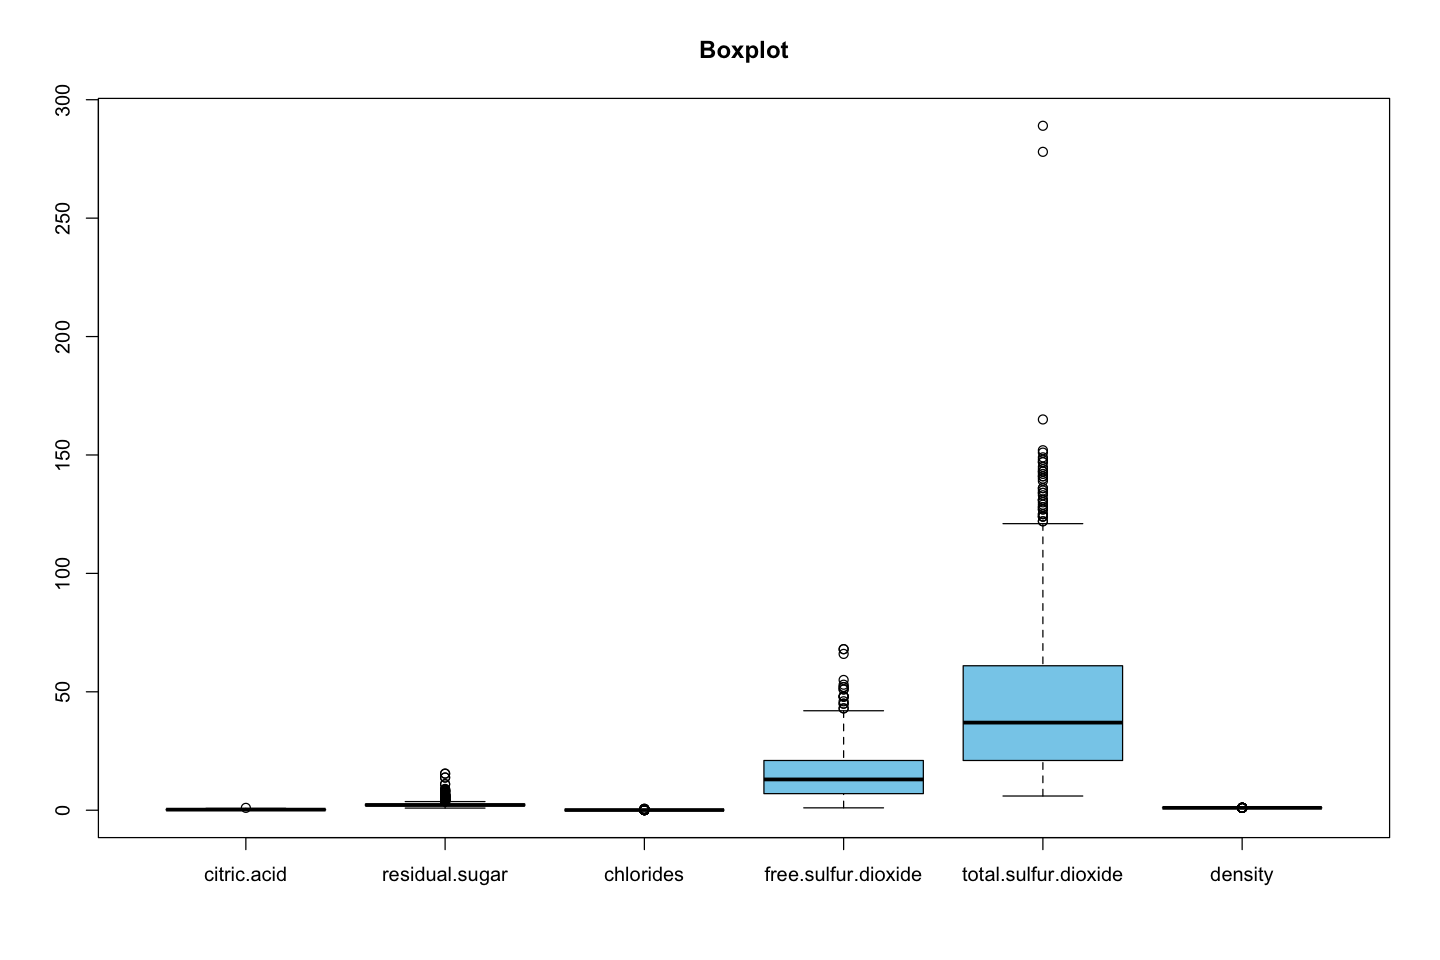

In [20]:
# Vẽ biểu đồ Boxplot để kiểm tra outlier
# Boxplot cho tất cả các biến trên cùng 1 biểu đồ
options(repr.plot.width = 12, repr.plot.height = 8)
boxplot(df, col = "skyblue", main = "Boxplot")


In [21]:
# Cài đặt vẽ đồ thị về lại mặc định
options(repr.plot.width = NULL, repr.plot.height = NULL)


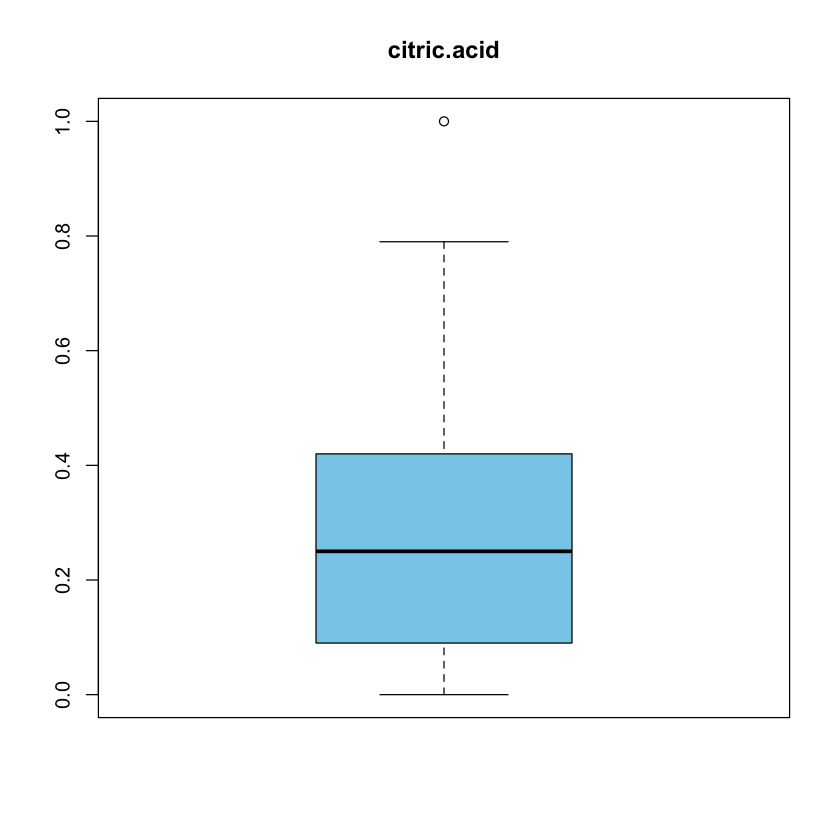

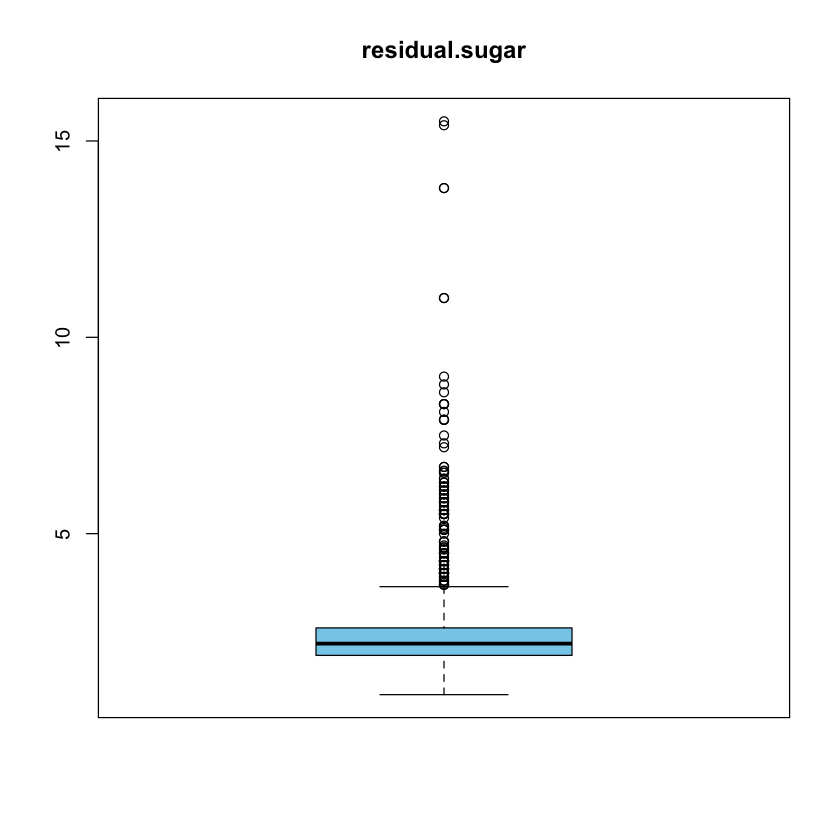

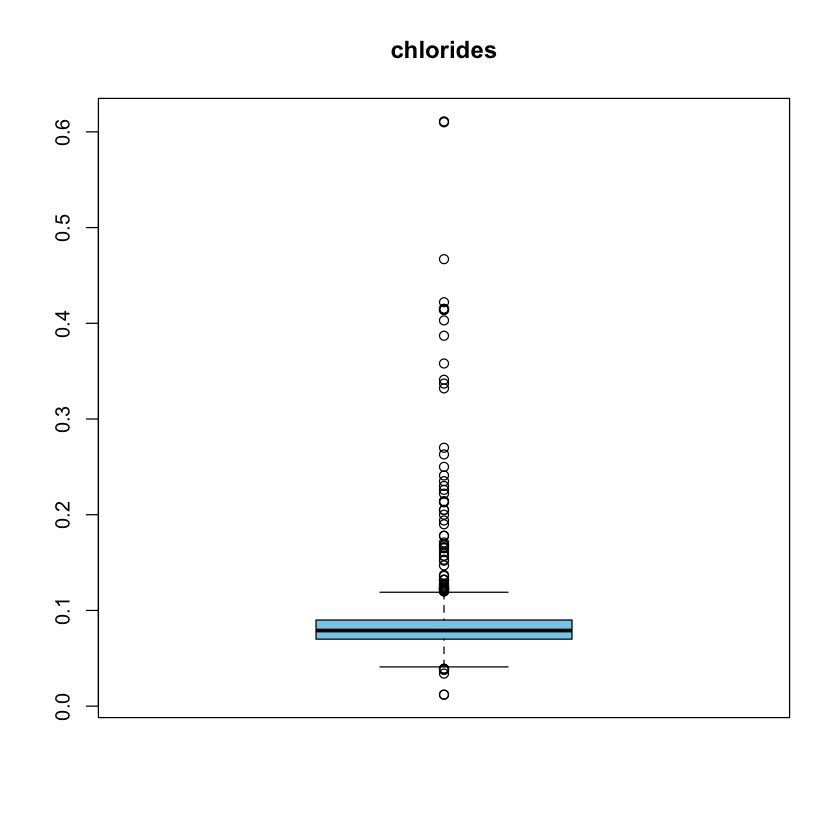

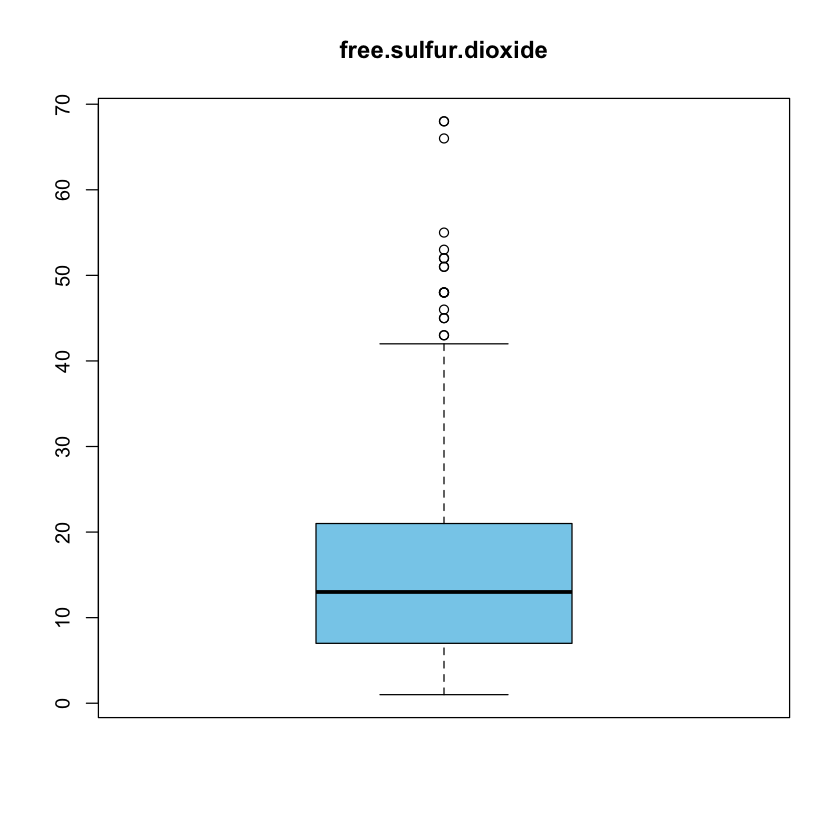

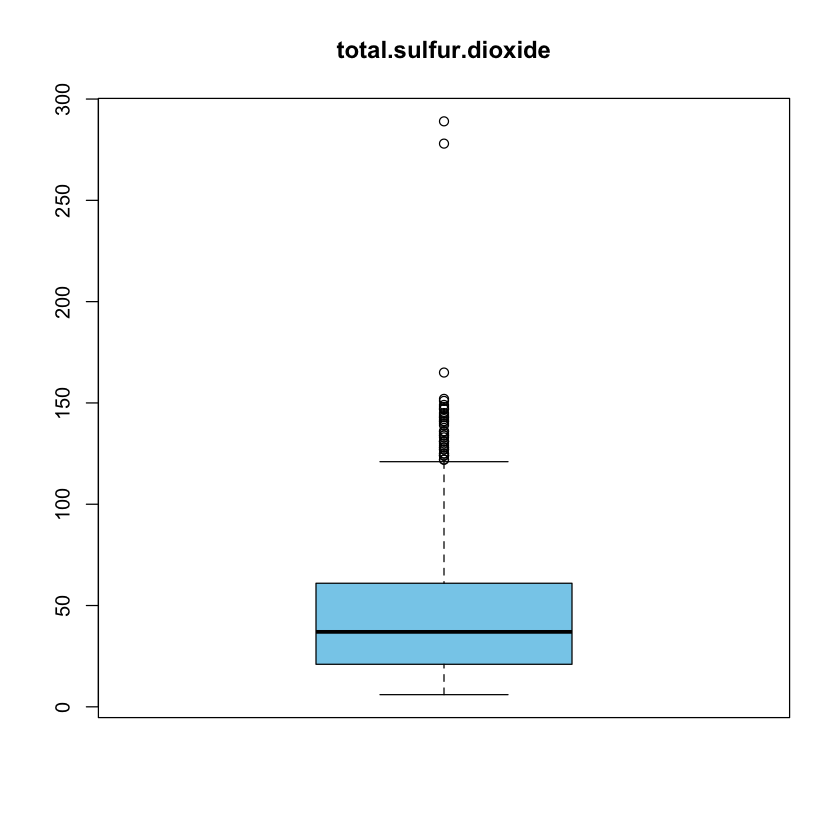

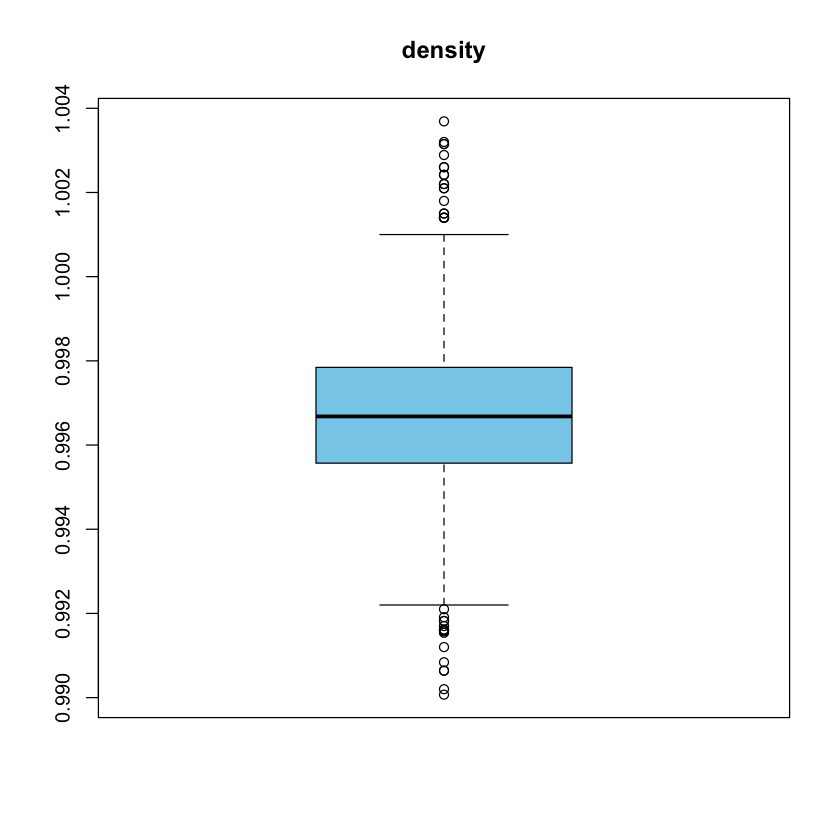

In [22]:
# Boxplot cho từng biến trên khác biểu đồ
for (col in colnames(df)) {
    # options(repr.plot.width=10, repr.plot.height=7)
    boxplot(df[[col]], col = "skyblue", main = col)
}


In [23]:
# Lưu tất cả dữ liệu ngoại lại vào outlier_df
outlier_df <- data.frame()
cols <- names(df)
for (col in cols) {
    Q1 <- quantile(df[[col]], 0.25)
    Q3 <- quantile(df[[col]], 0.75)
    IQR <- Q3 - Q1
    outliers <- df[df[[col]] < (Q1 - 1.5 * IQR) | df[[col]] > (Q3 + 1.5 * IQR), ]
    n_out <- nrow(outliers)
    print(paste("So outlier cua cot ", col, ": ", n_out))
    outlier_df <- rbind(outlier_df, outliers)
}
print(paste("Tong so outlier cua df: ", nrow(unique(outlier_df))))


[1] "So outlier cua cot  citric.acid :  1"
[1] "So outlier cua cot  residual.sugar :  110"
[1] "So outlier cua cot  chlorides :  77"
[1] "So outlier cua cot  free.sulfur.dioxide :  18"
[1] "So outlier cua cot  total.sulfur.dioxide :  40"
[1] "So outlier cua cot  density :  36"
[1] "Tong so outlier cua df:  202"


- Bộ dữ liệu có khá nhiều các dữ liệu ngoại lai trên tất cả các biến, chiếm (200/1141\*100) ~ 17.5%
- Lựa chọn chỉ Loại bỏ dữ liệu ngoại lai quá lớn trong cột total.sulfur.dioxide có giá trị >250
- Dữ liệu có sự chênh lệch lớn đối với biến total.sulfur.dioxide so với các biến còn lại, do đó quyết định sử dụng phân tích nhân tố FA trên ma trận tương quan R


In [24]:
# Xem những hàng có giá trị total.sulfur.dioxide ngoại lai lớn:
df[df$total.sulfur.dioxide > 250, ]


,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
761,0.68,8.3,0.05,37.5,278,0.99316
762,0.68,8.3,0.05,37.5,289,0.99316


In [25]:
# Loại bỏ giá trị ngoại lai ra khỏi df:
df <- df[df$total.sulfur.dioxide < 250, ]
# Xem lại số dòng của df sau khi loại bỏ outlier
dim(df)


[1] 1141    6

### TIẾN HÀNH PHÂN TÍCH NHÂN TỐ (FACTOR ANALYSIC)


#### PHƯƠNG PHÁP THÀNH PHẦN CHÍNH DỰA TRÊN MA TRẬN TƯƠNG QUAN R


In [26]:
# Ma trận tương quan R
R <- cor(df)
R


,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density
citric.acid,1.00000000,0.16343024,0.24927399,-0.06594508,0.01081105,0.38469207
residual.sugar,0.16343024,1.00000000,0.07798317,0.15244605,0.14581092,0.40160861
chlorides,0.24927399,0.07798317,1.00000000,0.01829011,0.06100950,0.20709474
free.sulfur.dioxide,-0.06594508,0.15244605,0.01829011,1.00000000,0.66803776,-0.04753698
total.sulfur.dioxide,0.01081105,0.14581092,0.06100950,0.66803776,1.00000000,0.07764628
density,0.38469207,0.40160861,0.20709474,-0.04753698,0.07764628,1.00000000


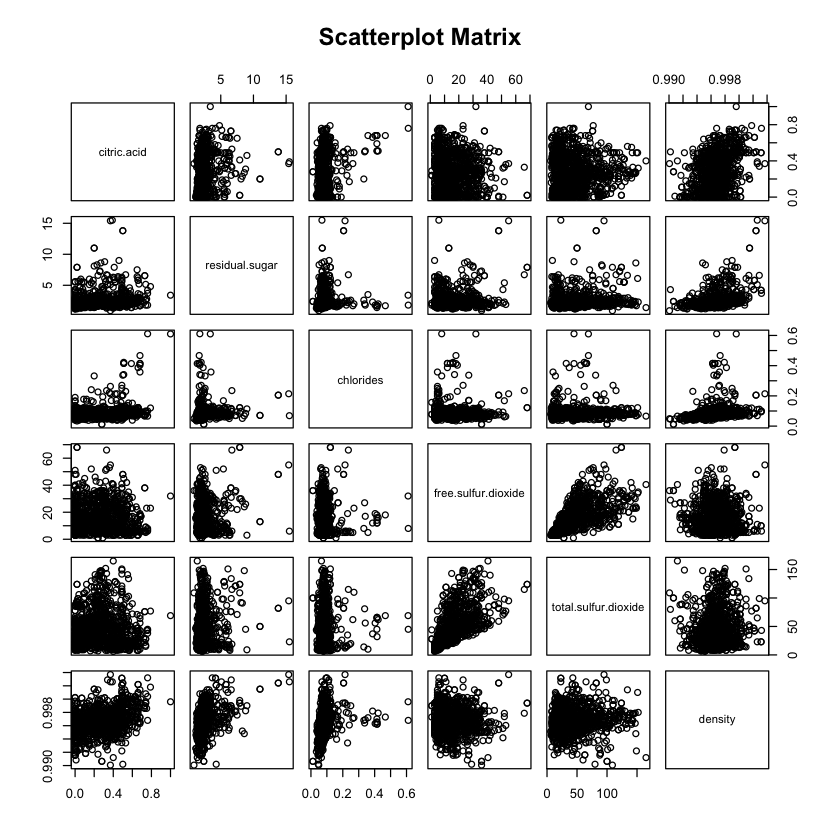

In [27]:
# Vẽ biểu đồ Scatterplot cho toàn bộ các cột dữ liệu
# options(repr.plot.width=20, repr.plot.height=7)
pairs(df, main = "Scatterplot Matrix")


In [28]:
# eigenvalues của R
eigenvalues <- eigen(R)
eigenvalues


eigen() decomposition
$values
[1] 1.8567306 1.6296925 0.9575590 0.7180024 0.5249144 0.3131011

$vectors
           [,1]       [,2]        [,3]        [,4]        [,5]         [,6]
[1,] -0.3636956  0.4101200 -0.22518717  0.68711932  0.42031726  0.004280474
[2,] -0.4611056  0.1170348  0.58000753 -0.42449984  0.49019484  0.129555547
[3,] -0.3014991  0.2353268 -0.73175947 -0.56286832  0.03757164  0.003911230
[4,] -0.3805299 -0.5881484 -0.07717306  0.06081833  0.11095113 -0.698078605
[5,] -0.4439859 -0.5198080 -0.11239073  0.15780789 -0.20203557  0.674034724
[6,] -0.4714648  0.3828927  0.24253396  0.04737073 -0.72698161 -0.203826379


In [29]:
lambdas <- eigenvalues$values
lambdas


[1] 1.8567306 1.6296925 0.9575590 0.7180024 0.5249144 0.3131011

- Từ bảng phân tích giá trị riêng ta thấy rằng, Trong bộ dữ liệu này chỉ có 2 trị riêng đầu tiên (lần lượt là 1.85673057639695 và 1.62969253876925) > 1 là có ý nghĩa, các trị riêng còn lại đều < 1. Vậy ta có thể quyết định số nhân tố cần giữ lại = 2.


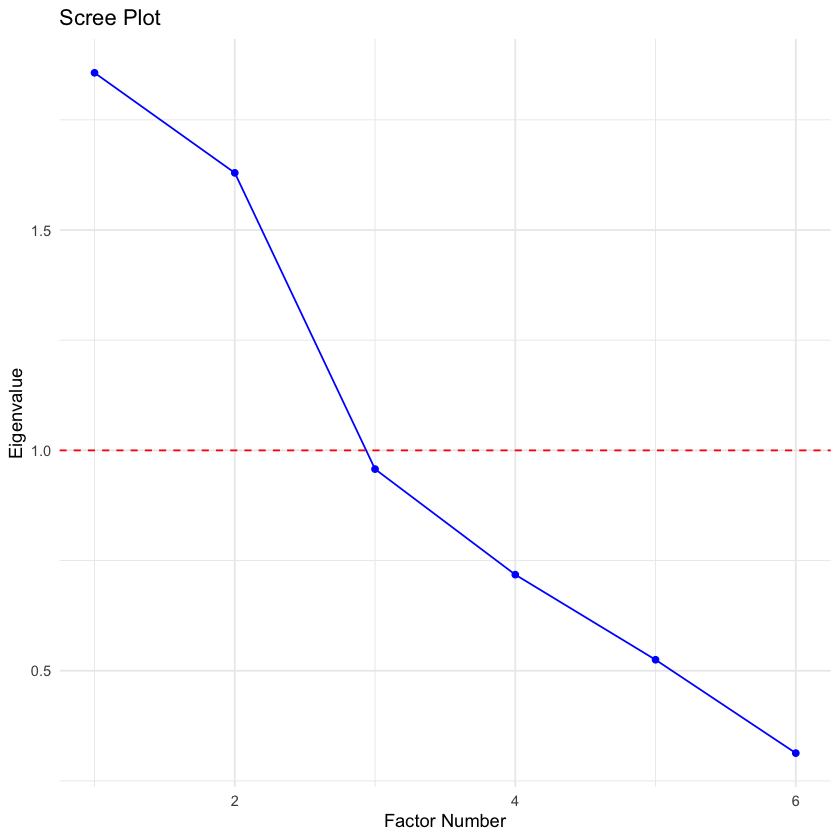

In [30]:
# Vẽ Scree plot để minh hoạ thêm
# Tạo dataframe cho ggplot
eigen_df <- data.frame(Factor = 1:length(lambdas), Eigenvalue = lambdas)

# Vẽ biểu đồ Scree
ggplot(eigen_df, aes(x = Factor, y = Eigenvalue)) +
  geom_line(color = "blue") + # Vẽ đường nối các điểm
  geom_point(color = "blue") + # Vẽ các điểm
  geom_hline(yintercept = 1, linetype = "dashed", color = "red") + # Đường ngang tại giá trị riêng = 1
  labs(title = "Scree Plot", x = "Factor Number", y = "Eigenvalue") + # Tiêu đề và nhãn trục
  theme_minimal() # Chủ đề đồ họa


In [31]:
# Tỷ lệ tích luỹ (cumulative proportion):
cumsum(lambdas) / sum(lambdas)


[1] 0.3094551 0.5810705 0.7406637 0.8603307 0.9478165 1.0000000

In [32]:
# Factor loadings:
L <- cbind(
    sqrt(lambdas[1]) * eigenvalues$vectors[, 1],
    sqrt(lambdas[2]) * eigenvalues$vectors[, 2]
)
L


-0.4955785,0.5235568
-0.6283113,0.1494060
-0.4108284,0.3004168
-0.5185172,-0.7508268
-0.6049836,-0.6635838
-0.6424268,0.4887986


#### Giải thích bảng tải nhân tố (Factor Loadings):

- Ma trận có 6 hàng tương ứng với 6 biến.
- Có 2 cột tương ứng với 2 nhân tố. Cột 1 và Cột 2 đại diện cho tải của mỗi biến trên hai nhân tố khác nhau.
- Các giá trị trong ma trận cho biết mối liên hệ tương đối giữa mỗi biến (hàng) với mỗi nhân tố (cột).
  - Giá trị dương cho thấy một mối tương quan tích cực với nhân tố, tức là khi giá trị nhân tố tăng thì giá trị của biến cũng tăng.
  - Giá trị âm cho thấy mối tương quan tiêu cực, nghĩa là khi giá trị nhân tố tăng thì giá trị của biến lại giảm.

#### Chi Tiết Các Tải Nhân Tố

- Nhân tố 1 (Cột 1):
  - Citric Acid: -0.4955785
  - Residual Sugar: -0.6283113
  - Chlorides: -0.4108284
  - Free Sulfur Dioxide: -0.5185172
  - Total Sulfur Dioxide: -0.6049836
  - Density: -0.6424268

Các giá trị âm cho thấy sự tương quan tiêu cực mạnh giữa Nhân tố 1 và tất cả các biến này. Nhân tố 1 có thể đại diện cho một yếu tố giảm thiểu hoặc ảnh hưởng tiêu cực đến các tính chất này của rượu.

- Nhân tố 2 (Cột 2):
  - Citric Acid: 0.5235568
  - Residual Sugar: 0.1494060
  - Chlorides: 0.3004168
  - Free Sulfur Dioxide: -0.7508268
  - Total Sulfur Dioxide: -0.6635838
  - Density: 0.4887986

Các giá trị dương cho Citric Acid, Residual Sugar, và Chlorides cũng như Density cho thấy sự tương quan tích cực giữa các biến này với Nhân tố 2, còn các giá trị âm đối với Free và Total Sulfur Dioxide cho thấy mối quan hệ tiêu cực. Nhân tố này có thể đại diện cho một yếu tố thúc đẩy hoặc cải thiện các đặc tính này.

#### Ý nghĩa tổng quát:

Nhân tố 1 có thể liên quan đến các yếu tố giảm chất lượng hoặc tính ổn định của rượu, ví dụ như yếu tố liên quan đến mật độ hoặc hàm lượng hóa chất cao. Trong khi đó, Nhân tố 2 có thể liên quan đến các đặc tính cải thiện hương vị hoặc chất lượng của rượu, như sự hiện diện của citric acid và sugar tăng cường hương vị ngọt ngào, hoặc mật độ cao có thể là do nồng độ cồn.


#### PHƯƠNG PHÁP HỢP LÝ CỰC ĐẠI


In [33]:
ftmodel <- factanal(df, factors = 2, rotation = "none")
ftmodel



Call:
factanal(x = df, factors = 2, rotation = "none")

Uniquenesses:
         citric.acid       residual.sugar            chlorides 
               0.793                0.762                0.932 
 free.sulfur.dioxide total.sulfur.dioxide              density 
               0.005                0.536                0.261 

Loadings:
                     Factor1 Factor2
citric.acid                   0.450 
residual.sugar        0.153   0.464 
chlorides                     0.261 
free.sulfur.dioxide   0.997         
total.sulfur.dioxide  0.670   0.126 
density                       0.858 

               Factor1 Factor2
SS loadings      1.474   1.238
Proportion Var   0.246   0.206
Cumulative Var   0.246   0.452

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 35.51 on 4 degrees of freedom.
The p-value is 3.64e-07 

#### Giải thích và Nhận Xét
- Độc Lập (Uniquenesses): Độc lập của một biến cho biết phần trăm biến thiên của biến đó không được giải thích bởi các nhân tố mô hình hóa. Một giá trị độc lập cao (gần 1) cho biết rằng hầu hết biến thiên của biến đó không được các nhân tố chung giải thích.
    - Citric Acid: 0.793 - Đa số biến thiên không được giải thích bởi các nhân tố.
    - Residual Sugar: 0.762 - Tương tự, đa số biến thiên không được giải thích.
    - Chlorides: 0.932 - Rất ít biến thiên được các nhân tố giải thích, phần lớn độc lập.
    - Free Sulfur Dioxide: 0.005 - Hầu hết biến thiên được giải thích bởi các nhân tố.
    - Total Sulfur Dioxide: 0.536 - Khoảng một nửa biến thiên được giải thích.
    - Density: 0.261 - Phần lớn biến thiên được giải thích bởi các nhân tố.
- Tải Nhân Tố (Loadings): Tải nhân tố cho biết mối quan hệ giữa mỗi biến và các nhân tố. Các giá trị cao cho thấy mối quan hệ mạnh mẽ giữa biến và nhân tố đó.
    - Factor1:
        - Free Sulfur Dioxide: 0.997 - Mối quan hệ mạnh mẽ với Nhân tố 1.
        - Total Sulfur Dioxide: 0.670 - Mối quan hệ vừa phải đến mạnh.
    - Factor2:
        - Density: 0.858 - Mối quan hệ mạnh.
        - Residual Sugar: 0.464 - Mối quan hệ vừa phải.
        - Citric Acid: 0.450 - Mối quan hệ vừa phải.
        - Chlorides: 0.261 - Mối quan hệ yếu.
    - SS Loadings, Proportion Var, và Cumulative Var:
        - SS Loadings: Tổng của bình phương tải nhân tố cho từng nhân tố, đo lường tổng đóng góp biến thiên của nhân tố đối với các biến.
        - Proportion Var: Tỷ lệ biến thiên mỗi nhân tố giải thích: nhân tố 1 giải thích 24.6% trên tổng biến thiên, nhân tố 2 giải thích 20.6% tổng biến thiên, 
        - Cumulative Var: Tỷ lệ biến thiên tích lũy được giải thích bởi các nhân tố: Nhân tố 1 và 2 giải thích được 45.2% tổng biến thiên.
        
#### KẾT LUẬN:
Phân tích nhân tố cho thấy mặc dù hai nhân tố có thể giải thích một phần đáng kể biến thiên, nhưng chưa đủ để giải thích toàn bộ biến thiên trong dữ liệu. Điều này cho thấy cần xem xét thêm các nhân tố khác hoặc cần có một mô hình phức tạp hơn để hiểu rõ hơn về dữ liệu. Các biến như free sulfur dioxide và density có mối quan hệ mạnh với các nhân tố và có thể là chìa khóa để hiểu các yếu tố ảnh hưởng đến chất lượng rượu.
